In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [2]:
# Load the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

# Create the datasets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the data ./255
X_train, X_test = X_train/255.0, X_test/255.0

print("X_train.shape: ", X_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
X_train.shape:  (60000, 28, 28)


In [3]:
# Convert the shape of data to make it suitable for CNNs
# Expand the dimension of X_train/test
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

print(X_train.shape)

(60000, 28, 28, 1)


In [4]:
# Get the number of classes to be classified
K = len(set(y_train))
print("number of classes: ", K)

number of classes:  10


In [5]:
# Create the model using functional API
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656

In [7]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 12s 3ms/step - loss: 0.7069 - accuracy: 0.7390 - val_loss: 0.3854 - val_accuracy: 0.8546
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3704 - accuracy: 0.8613 - val_loss: 0.3380 - val_accuracy: 0.8724
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3190 - accuracy: 0.8791 - val_loss: 0.3208 - val_accuracy: 0.8854
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2820 - accuracy: 0.8917 - val_loss: 0.3225 - val_accuracy: 0.8840
Epoch 5/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2584 - accuracy: 0.9038 - val_loss: 0.2903 - val_accuracy: 0.8951
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2286 - accuracy: 0.9147 - val_loss: 0.2962 - val_accuracy: 0.8928
Epoch 7/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2094 - accuracy: 0.9207 - val_loss: 0.3064 - val_accuracy

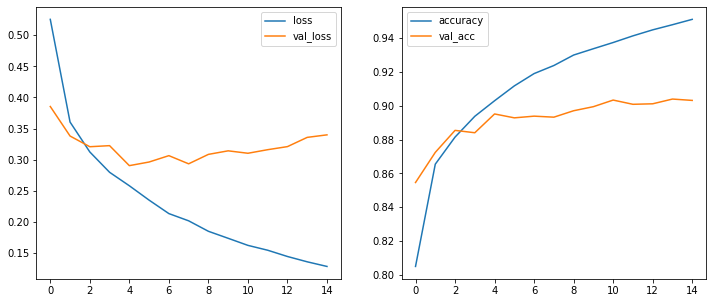

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Plot of loss per iteration
ax1.plot(r.history['loss'], label='loss')
ax1.plot(r.history['val_loss'], label='val_loss')
ax1.legend()

# Plot of accuracy per iteration
ax2.plot(r.history['accuracy'], label='accuracy')
ax2.plot(r.history['val_accuracy'], label='val_acc')
ax2.legend()

In [19]:
# Plot the confusion matrix to see where the model went wrong
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix, without normalization
[[859   1  21  20   5   1  89   0   4   0]
 [  3 978   1  12   3   0   2   0   1   0]
 [ 23   0 839  11  64   0  63   0   0   0]
 [  7   5  12 927  22   0  27   0   0   0]
 [  0   1  42  29 824   0 103   0   1   0]
 [  1   0   0   0   0 964   0  27   0   8]
 [107   2  56  25  68   0 730   1  11   0]
 [  0   0   0   0   0   6   0 981   0  13]
 [  3   0   3   1   4   1   7   3 978   0]
 [  1   0   0   0   0   5   0  43   0 951]]


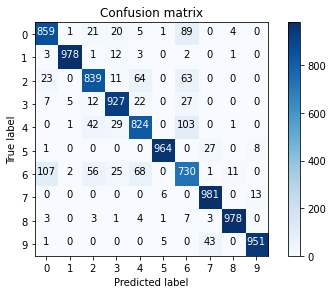

In [20]:
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Displaying Misclassified example

In [21]:
# Label map
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

Text(0.5, 1.0, 'True label: T-shirt/top | Predicted: Shirt')

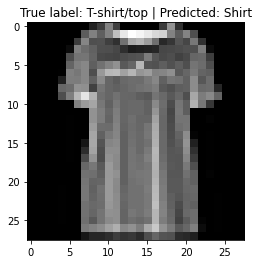

In [24]:
# Display an example
misclassified = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified)
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title('True label: %s | Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]))